# Tutorial 1: Exploratory Data Analysis

Welcome to the first of three tutorials for the second **Global Data Science Challenge**. Your task is to predict the lead time of IT support tickets, i.e. the time until a ticket will be closed. In the tutorials you will learn how to run a data science project. In the end, you can build your own solution and compete against the other participants.

In the kickoff meeting you learned about the business requirements. In this tutorial, we will do an exploratory data analysis (EDA). This is the first step after you got your hands on some new data. The goal of an EDA is to 

- Get an understanding of the data and the underlying distributions
- Verify that the assumptions made in the business requirements hold

Let's get started!

In [1]:
# The first cell in a notebook typically contains all the imports you'll need throughout the analysis.
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')  # Matplotlib support different style sheets. Pick your favourite!

# The following line enables plots in jupyter noteboks
%matplotlib inline  

# Loading the data

In [2]:
file_path='../data/gdsc2_public.csv'
df = pd.read_csv(file_path, sep=';', parse_dates=['timestamp'])
df = df.sort_values(by=['work_item', 'timestamp']) # To make sure our entries are ordered
df.head()

timestamp  work_item work_type work_priority    domain  \
0   2015-01-02 14:39:14  WI_000001  WT_00001      WP_00003  BD_00001   
24  2015-01-05 11:48:08  WI_000001  WT_00001      WP_00003  BD_00001   
29  2015-01-05 12:35:59  WI_000001  WT_00001      WP_00003  BD_00001   
140 2015-01-07 11:04:51  WI_000001  WT_00001      WP_00003  BD_00001   
145 2015-01-07 14:04:44  WI_000001  WT_00001      WP_00003  BD_00001   

     platform components from_phase to_phase from_resource to_resource  
0    PL_00001        NaN        NaN  Analyze           NaN    ER_00043  
24   PL_00001        NaN    Analyze   Design      ER_00043    ER_00149  
29   PL_00001        NaN     Design  Analyze      ER_00149    ER_00149  
140  PL_00001        NaN    Analyze   Design      ER_00149    ER_00043  
145  PL_00001        NaN     Design  Analyze      ER_00043    ER_00149

The meaning of the columns is as follows:

- timestamp: Contains the date and time of each single ticket change. 
- work_item: The unique ID of a support ticket.
- work_type: What kind of ticket (e.g. hotfix, bug, change request)
- work_priority: How important the ticket is. Lower numbers mean more important.
- domain: From which business area is the ticket
- platform: From which platform is the ticket
- components: Which components are affected by the ticket
- from_phase: The phase in which the ticket was before the change. Note that a missing value denotes a new ticket.
- to_phase: The phase in which the ticket was after the change. Note that a missing value denotes that the ticket was closed
- from_resource: The ID of the resource (i.e. person) who was working on the ticket till now
- to_resource: The ID of the resource (i.e. person) who will now work on this ticket

At first glance it seems that the most important columns are timestamp and work_item. Timestamp will define the values we have to predict, work_item sets the IDs. The remaining columns contain information that can be used as features for our model.

For simplification, we replace the NaNs with names that are easier to understand

In [4]:
df.from_phase.fillna('Start', inplace=True)  
df.to_phase.fillna('End', inplace=True)
df.head()

timestamp  work_item work_type work_priority    domain  \
0   2015-01-02 14:39:14  WI_000001  WT_00001      WP_00003  BD_00001   
24  2015-01-05 11:48:08  WI_000001  WT_00001      WP_00003  BD_00001   
29  2015-01-05 12:35:59  WI_000001  WT_00001      WP_00003  BD_00001   
140 2015-01-07 11:04:51  WI_000001  WT_00001      WP_00003  BD_00001   
145 2015-01-07 14:04:44  WI_000001  WT_00001      WP_00003  BD_00001   

     platform components from_phase to_phase from_resource to_resource  
0    PL_00001        NaN      Start  Analyze           NaN    ER_00043  
24   PL_00001        NaN    Analyze   Design      ER_00043    ER_00149  
29   PL_00001        NaN     Design  Analyze      ER_00149    ER_00149  
140  PL_00001        NaN    Analyze   Design      ER_00149    ER_00043  
145  PL_00001        NaN     Design  Analyze      ER_00043    ER_00149

# Exploratory Data Analysis (EDA)
Let's take a closer look at the data. Remember the goals of the EDA:
- Get an understanding of the data and the underlying distributions
- Verify that the assumptions made in the business requirements hold

In [5]:
print(min(df.timestamp))
print(max(df.timestamp))
print(len(df.work_item.unique()))

2015-01-02 14:39:14
2018-03-30 19:07:03
11564


The data set contains information about 11564 tickets. The first entry is from from the date 02.01.2015, the last from 30.03.2018. Next, we consider the workflow of single tickets

In [5]:
df[df.work_item == 'WI_005405']

timestamp  work_item work_type work_priority    domain  \
32621 2016-11-16 14:53:35  WI_005405  WT_00001      WP_00002  BD_00008   
32622 2016-11-16 14:53:39  WI_005405  WT_00001      WP_00002  BD_00008   

       platform components from_phase to_phase from_resource to_resource  
32621  PL_00014        NaN      Start  Analyze           NaN    ER_00284  
32622  PL_00014        NaN    Analyze      End      ER_00284         NaN

Ticket WI_005405 was closed after only 4 seconds. Seems like someone took at look and decided it was a non-issue.

In [6]:
df[df.work_item == 'WI_000273']

timestamp  work_item work_type work_priority    domain  \
1165  2015-02-02 19:58:53  WI_000273  WT_00003      WP_00002  BD_00007   
1184  2015-02-03 10:38:27  WI_000273  WT_00003      WP_00002  BD_00007   
26789 2016-08-01 17:04:51  WI_000273  WT_00003      WP_00002  BD_00007   
26790 2016-08-01 17:05:13  WI_000273  WT_00003      WP_00002  BD_00007   
26791 2016-08-01 17:05:17  WI_000273  WT_00003      WP_00002  BD_00007   
26792 2016-08-01 17:05:24  WI_000273  WT_00003      WP_00002  BD_00007   
43738 2017-05-03 14:42:20  WI_000273  WT_00003      WP_00002  BD_00007   
57574 2017-10-30 16:11:27  WI_000273  WT_00003      WP_00002  BD_00007   
71819 2018-03-29 13:39:26  WI_000273  WT_00003      WP_00002  BD_00007   

       platform components from_phase to_phase from_resource to_resource  
1165   PL_00007        NaN      Start  Analyze           NaN    ER_00048  
1184   PL_00007        NaN    Analyze   Design      ER_00048    ER_00091  
26789  PL_00007        NaN     Design    Build      ER_00091    ER_00091  
26790  PL_00007        NaN      Build     Test      ER_00091    ER_00091  
26791  PL_00007        NaN       Test  Package      ER_00091    ER_00091  
26792  PL_00007        NaN    Package   Accept      ER_00091    ER_00091  
43738  PL_00007        NaN     Accept     Test      ER_00091    ER_00048  
57574  PL_00007        NaN       Test    Build      ER_00048    ER_00262  
71819  PL_00007        NaN      Build     Test      ER_00262    ER_00262

Ticker WI_000273 shows the other extreme. After more than three years, the ticket is still open. Notice how the status of the ticket, i.e. the values in from_phase and to_phase changes multiple times. Working on a ticket is no simple one-way street, which should be no surprise any developer.

## Phases
The different phases of a work item are a major indicator of *how ready* a work item is. We should know how they are related.

In [9]:
crosstab = pd.crosstab(df.from_phase, df.to_phase)
crosstab.reindex(index=['Start','Analyze', 'Clarify','Design', 'Build', 'Test', 'Package', 'Accept', 'Deploy', 'End'], 
               columns=['Start', 'Analyze', 'Clarify', 'Design', 'Build', 'Test', 'Package', 'Accept', 'Deploy', 'End'])


to_phase    Start  Analyze  Clarify   Design   Build    Test  Package  Accept  \
from_phase                                                                      
Start         NaN  11564.0      0.0      0.0     0.0     0.0      0.0     0.0   
Analyze       NaN    172.0      3.0  10034.0    10.0     0.0      0.0     0.0   
Clarify       NaN      2.0      0.0      0.0     0.0     0.0      0.0     0.0   
Design        NaN    779.0      0.0     50.0  9114.0     1.0      0.0     0.0   
Build         NaN      2.0      0.0    788.0     0.0  5263.0      0.0  3294.0   
Test          NaN      0.0      0.0      0.0   971.0     0.0   5796.0     0.0   
Package       NaN      0.0      0.0      0.0     0.0    95.0      0.0  4722.0   
Accept        NaN      0.0      0.0      0.0     0.0  1460.0      0.0     0.0   
Deploy        NaN      0.0      0.0      0.0     0.0     0.0      0.0   161.0   
End           NaN      NaN      NaN      NaN     NaN     NaN      NaN     NaN   

to_phase    Deploy     End  
from_phase                  
Start          0.0     0.0  
Analyze        0.0  1717.0  
Clarify        0.0     0.0  
Design         0.0   788.0  
Build          0.0   663.0  
Test           0.0     0.0  
Package      524.0   441.0  
Accept      6630.0     0.0  
Deploy         0.0  6913.0  
End            NaN     NaN

The default path for a work item seems to be 
- Start
- Analyze
- Design
- Build
- Test
- Package
- Accept
- Deploy
- End

However, the plot also shows that there are several others paths.

**Excercise: Analyse the different workflows via process mining**

The crossplot tells us that there are many different phase flows. But what does this mean for the individual tickets? For this analysis, we first aggregate information on a per-ticket level. (Which is also a great way of computing features for the learning algorithm later)

In [10]:
def aggregation(x):
    names = {
        'was_closed': max(x['to_phase'] == 'End'),
        'nr_of_phases': len(x),  # Not counting the start phase
        'unique_phases': x['from_phase'].nunique()  # Not counting the end phase
        }
    return pd.Series(names)

df_workitem_agg = df.groupby('work_item').apply(aggregation)
df_workitem_agg.head()

was_closed  nr_of_phases  unique_phases
work_item                                         
WI_000001        True            12              8
WI_000002        True             4              4
WI_000003        True             8              6
WI_000004        True             8              8
WI_000005        True             8              6

We compare the numbers with the original data to test that there is no error in our aggregation.

In [11]:
df[df.work_item == 'WI_000003']

timestamp  work_item work_type work_priority    domain  \
2    2015-01-02 15:28:22  WI_000003  WT_00002      WP_00004  BD_00002   
676  2015-01-21 11:37:06  WI_000003  WT_00002      WP_00004  BD_00002   
677  2015-01-21 11:39:20  WI_000003  WT_00002      WP_00004  BD_00002   
1825 2015-02-16 12:53:44  WI_000003  WT_00002      WP_00004  BD_00002   
2127 2015-02-23 09:55:33  WI_000003  WT_00002      WP_00004  BD_00002   
2128 2015-02-23 09:55:37  WI_000003  WT_00002      WP_00004  BD_00002   
2339 2015-02-26 11:50:23  WI_000003  WT_00002      WP_00004  BD_00002   
2340 2015-02-26 11:50:37  WI_000003  WT_00002      WP_00004  BD_00002   

      platform         components from_phase to_phase from_resource  \
2     PL_00002  CO_00037/CO_00071      Start  Analyze           NaN   
676   PL_00002  CO_00037/CO_00071    Analyze   Design      ER_00225   
677   PL_00002  CO_00037/CO_00071     Design  Analyze      ER_00225   
1825  PL_00002  CO_00037/CO_00071    Analyze   Design      ER_00225   
2127  PL_00002  CO_00037/CO_00071     Design    Build      ER_00225   
2128  PL_00002  CO_00037/CO_00071      Build     Test      ER_00225   
2339  PL_00002  CO_00037/CO_00071       Test  Package      ER_00225   
2340  PL_00002  CO_00037/CO_00071    Package      End      ER_00225   

     to_resource  
2       ER_00225  
676     ER_00225  
677     ER_00225  
1825    ER_00225  
2127    ER_00225  
2128    ER_00225  
2339    ER_00225  
2340         NaN

The describe and value_counts methods are a great way to get a basic understanding of the data.

**Exercise: Filter on the open/closed tickets and see how the numbers change**

In [12]:
df_workitem_agg.describe()

nr_of_phases  unique_phases
count  11564.000000   11564.000000
mean       6.222501       5.515911
std        3.285784       2.385456
min        1.000000       1.000000
25%        3.000000       3.000000
50%        6.000000       6.000000
75%        8.000000       8.000000
max       34.000000       9.000000

In [13]:
df_workitem_agg.was_closed.value_counts()

True     10522
False     1042
Name: was_closed, dtype: int64

While the describe function is good for a first impression, a boxplot delivers even better insights.
The top of the box shows the third quartile (75%), the bottom the first quartile (25%). The line is middle shows the median (50%). In general, circles can be considered as outliers.

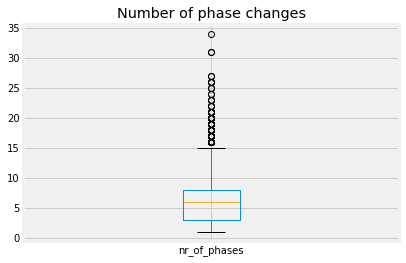

In [14]:
df_workitem_agg.plot(kind='box', y='nr_of_phases', title='Number of phase changes')

Histograms are another good way to illustrate distributions.

Text(0, 0.5, 'Number of tickets')

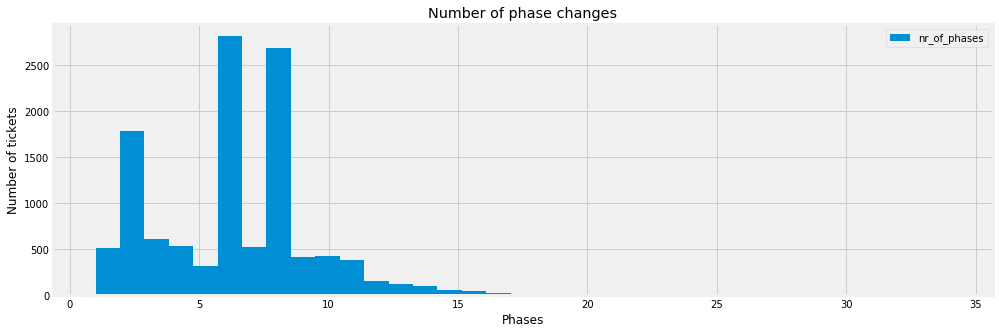

In [15]:
df_workitem_agg.plot(kind='hist', y='nr_of_phases', bins=35, figsize=(15, 5), title='Number of phase changes')
# Alternatively you can use the base plt functionality: plt.hist(df_workitem_agg['nr_of_phases'])
plt.xlabel('Phases')
plt.ylabel('Number of tickets')

Many tickets are closed after only two phases changes. This is probably due to non-isses as we've seen in ticket *WI_005405* before. We can also see that less than a third of all tickets goes through all eight phases (not counting *start* and *clarify*). 

**Question: What could be the reason for this?**

So far, we always considered all tickets. Let's take a look at only the open tickets.

Text(0, 0.5, 'Number of tickets')

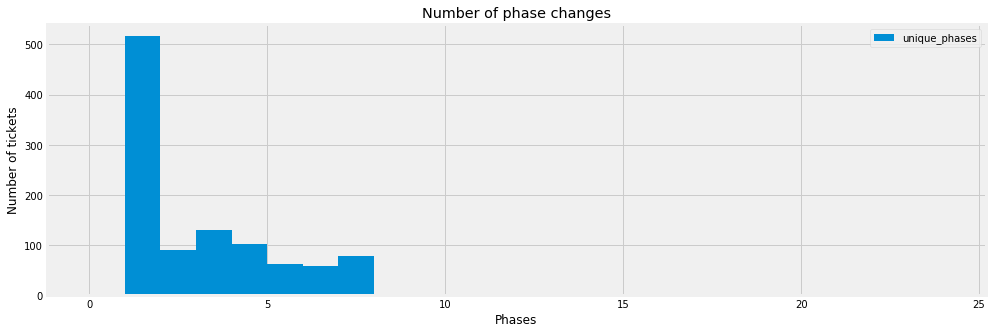

In [16]:
mask = ~df_workitem_agg.was_closed  # ~ negates a mask
df_workitem_agg[mask].plot(kind='hist', y='nr_of_phases', bins=range(25), figsize=(15, 5), title='Number of phase changes')
plt.xlabel('Phases')
plt.ylabel('Number of tickets')

The majority of open tickets is still in the first phase, i.e. they were created but never touched. 
Very few tickets already exceeded the default number of eight phases.

## Ticket durations
Let's take a closer look at the total lead time of the different work items, i.e. how much time passes between the creation and closing of a ticket.

In [17]:
relevant_columns = ['work_item', 'timestamp']
start_times = df[df.from_phase == 'Start'][relevant_columns]
end_times = df[df.to_phase == 'End'][relevant_columns]
times = pd.merge(start_times, end_times, on='work_item', how='left')
times['duration'] = times['timestamp_y'] - times['timestamp_x']
times['duration_in_days'] = times['duration'].apply(lambda x: round(x.total_seconds() / (24*3600), 2))
times.head()

work_item         timestamp_x         timestamp_y         duration  \
0  WI_000001 2015-01-02 14:39:14 2015-01-27 11:36:51 24 days 20:57:37   
1  WI_000002 2015-01-02 15:04:20 2015-01-14 09:46:37 11 days 18:42:17   
2  WI_000003 2015-01-02 15:28:22 2015-02-26 11:50:37 54 days 20:22:15   
3  WI_000004 2015-01-02 15:33:54 2015-01-28 09:11:05 25 days 17:37:11   
4  WI_000005 2015-01-02 16:32:11 2015-02-04 12:57:49 32 days 20:25:38   

   duration_in_days  
0             24.87  
1             11.78  
2             54.85  
3             25.73  
4             32.85

This table shows the start and end timestamp for each work_item.
The duration is the delta of the start and close timestamps.
Note that the duration includes working days as well as weekends and holidays.

Text(0.5, 0, 'Duration in days')

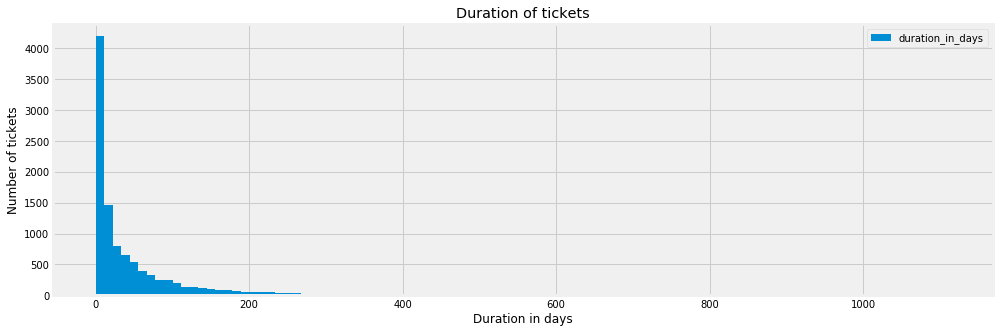

In [19]:
finished_times = times[pd.notnull(times.duration)]
finished_times.plot(kind='hist', y='duration_in_days', bins=100, figsize=(15, 5), title='Duration of tickets')
plt.ylabel("Number of tickets")
plt.xlabel("Duration in days")

We see a typical power law distribution. Apart from this we can't really get much info out of the graph. Let's change the number of bins and the bin size to get a closer look. 

Text(0.5, 0, 'Duration in days')

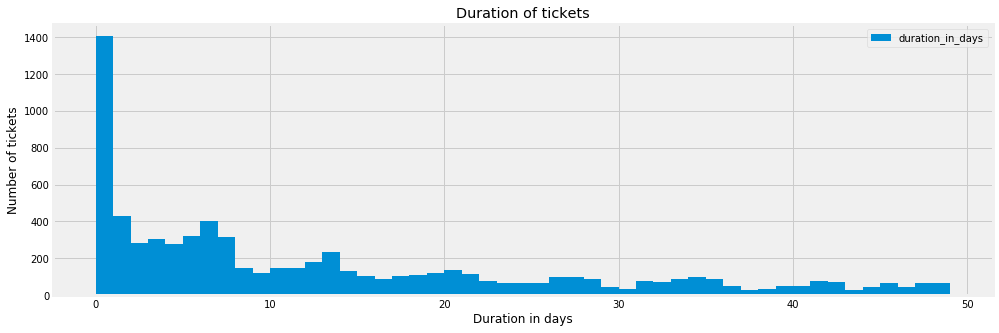

In [20]:
finished_times.plot(kind='hist', y='duration_in_days', bins=range(50), figsize=(15, 5), title='Duration of tickets')
plt.ylabel("Number of tickets")
plt.xlabel("Duration in days")

Now this looks a lot more interesting. We can see a some periodicity. Probably due to the week cycle.

## Open and closed tickets over time
As a last exercise, we analyse the number of open and closed tickets over time.

In [21]:
df.sort_values(by='timestamp', inplace=True)
current_date = df.loc[0].timestamp.date()
open_tickets_total = 0
closed_tickets_total = 0
open_tickets_per_day = 0
closed_tickets_per_day = 0
results = []

# Loop once through the data and keep track of the number of open and closed tickets
for _, row in df.iterrows():
    if row.timestamp.date() > current_date:
        results.append([current_date, open_tickets_total, closed_tickets_total, open_tickets_per_day, closed_tickets_per_day])
        current_date = row.timestamp.date()
        open_tickets_per_day = 0
        closed_tickets_per_day = 0        
    if row.from_phase == 'Start':
        open_tickets_total += 1
        open_tickets_per_day += 1
    if row.to_phase == 'End':
        closed_tickets_total += 1
        closed_tickets_per_day += 1 
results.append([current_date, open_tickets_total, closed_tickets_total, open_tickets_per_day, closed_tickets_per_day])

For easier manipulation and analysis, we convert our results into a DataFrame.

In [23]:
tickets_df = pd.DataFrame(results)
tickets_df.columns = ['date', 'open_tickets_total', 'closed_tickets_total', 'open_tickets_per_day', 'closed_tickets_per_day']
tickets_df['wip_tickets_total'] = tickets_df['open_tickets_total'] - tickets_df['closed_tickets_total']
tickets_df.head()

date  open_tickets_total  closed_tickets_total  open_tickets_per_day  \
0  2015-01-02                   6                     0                     6   
1  2015-01-03                   7                     0                     1   
2  2015-01-04                   9                     0                     2   
3  2015-01-05                  31                     0                    22   
4  2015-01-06                  48                     7                    17   

   closed_tickets_per_day  wip_tickets_total  
0                       0                  6  
1                       0                  7  
2                       0                  9  
3                       0                 31  
4                       7                 41

Loops are often easier to understand, but they are also horribly inefficient. The code below computes the same numbers with only build-in functionalities. 

**Exercise:** Compare the runtime of both approaches

In [24]:
resample_period = 'D'  # We’re going to resample the dataframe per day

# Calculate open tickets per day
open_per_day = times.resample(resample_period, on='timestamp_x').work_item.count().rename('open_tickets_per_day')

# Calculate closed tickets per day
is_closed = times.timestamp_y.notnull()  # tickets not closed yet have timestamp_y == NaT, let’s use this fact to create a quick filer
closed_per_day = times.loc[is_closed].resample(resample_period, on='timestamp_y').work_item.count().rename('closed_tickets_per_day')

# Let’s  concatenate the two dataframes and do some clean-up along the way
tickets_df = (pd.concat([open_per_day, closed_per_day], axis=1) # Join the two dataframes
                .fillna(0)                                      # Replace NaNs by 0 for those days when no tickets are opened or closed
                .astype(int)                                    # While we're at it, all counts are integers
                .reset_index()                                  # timestamp_x is used as index, move it back to a column
                .rename(columns={'timestamp_x': 'date'})        # and rename it to ‘date’
             )

tickets_df['open_tickets_total'] = tickets_df.open_tickets_per_day.cumsum()
tickets_df['closed_tickets_total'] = tickets_df.closed_tickets_per_day.cumsum()
tickets_df['wip_tickets_total'] = tickets_df.open_tickets_total - tickets_df.closed_tickets_total

The DataFrame class comes with an easy plotting interface:

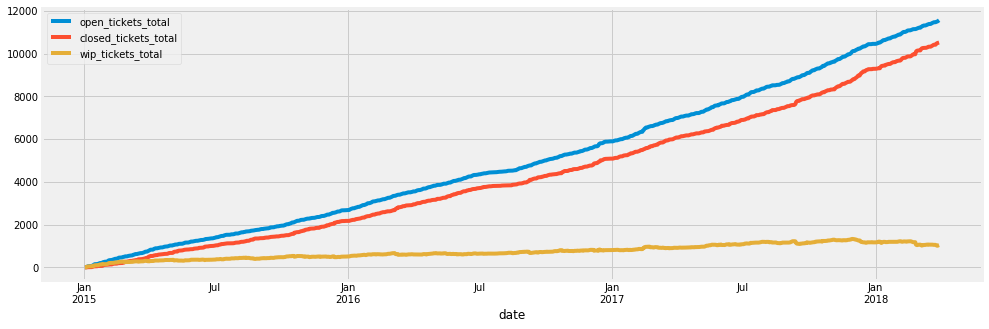

In [25]:
tickets_df.plot(x='date', y=['open_tickets_total', 'closed_tickets_total', 'wip_tickets_total'] , figsize=(15, 5))

The gap between the open and closed tickets grows over time. This will make predictions additionally hard. We will need to figure out which tickets will get worked on and which don't.

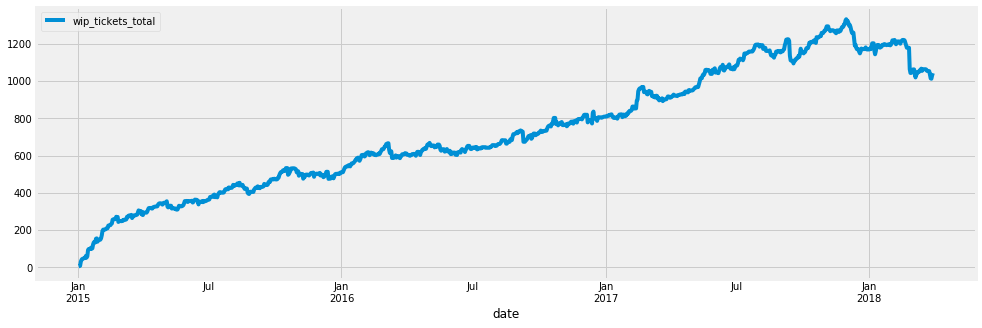

In [26]:
tickets_df.plot(x='date', y=['wip_tickets_total'] , figsize=(15, 5))

So far, we looked at the totals. What about the day-to-day numbers.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B986D8DF60>,
      dtype=object)

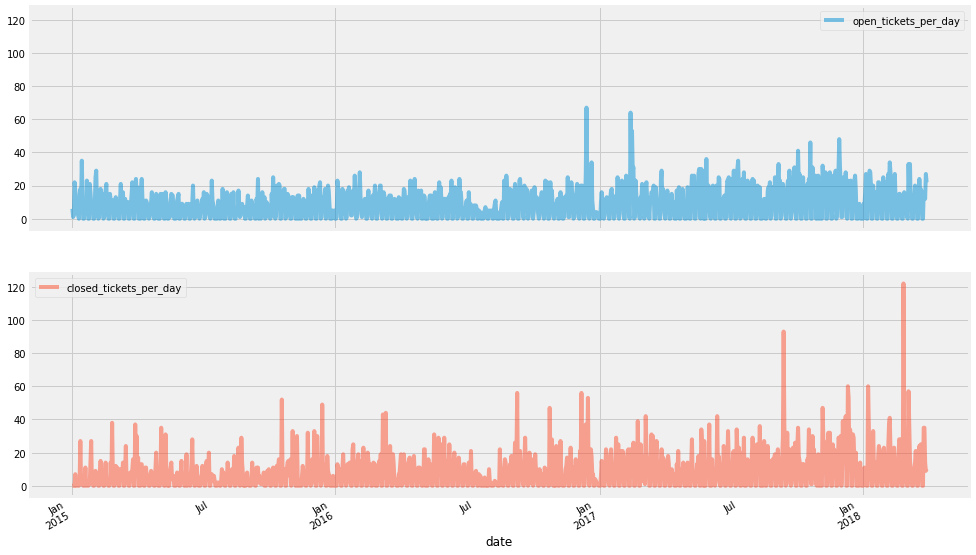

In [27]:
tickets_df.plot(x='date', y=['open_tickets_per_day', 'closed_tickets_per_day'] , 
                figsize=(15, 10), subplots=True, alpha=0.5, sharey=True)

There seems to be a slow increase in the number of tickets over time. We should also talk to business about the spikes. If e.g. the spikes in the number of closed tickets corresponds to the end of development sprints, then this could be an important feature for our prediction model.

## Conclusion
This concludes the initial EDA and our first tutorial! 
By now you should know how to load data into python and how to do a basic analysis.

In the next tutorial, we will build a first lead-time prediction model and show you how to submit results to the official leaderboard.